In [1]:
import matplotlib.pyplot as plt

In [2]:
# exmaple 1
original_tubes = [
          ['p','b','r','p'],
          ['y','g','g','r'],
          [[1,1,1]]*4,  [[1,1,1]]*4,
          ['p','y','y','r'],
          ['b','g','r','p'],
          ['b','b','y','g'],
]

In [3]:
def copytubes(tubes):
  new_tubes = [list(tube) for tube in tubes]
  return new_tubes

In [4]:
def replaceColors(tubes, colrs):
  for tube in tubes:
    for i,colr in enumerate(tube):
      if colr != [1,1,1]:
        tube[i] = colrs[colr]
  return tubes

In [5]:
colrs = {'p':"pink", 'b':"blue", 'r':"red", 'y':"yellow", 'g':"green"}
original_tubes = replaceColors(original_tubes, colrs)

In [6]:
def plot_tubes(tubes):
  fig, axs = plt.subplots(1,2, figsize=(10,3))
  n_tubes2 = len(tubes)//2
  n_tubes1 = len(tubes) - n_tubes2

  axs[0].set_xlim([-0.5,n_tubes1-0.5])
  axs[1].set_xlim([-0.5,n_tubes1-0.5])

  for i,tube in enumerate(tubes):
    for j,colr in enumerate(reversed(tube)):
      if colr != '0':
        axs[i//n_tubes1].bar(str(i+1), 1, bottom=j, color=colr, width=0.5, edgecolor='k')
      else:
        axs[i//n_tubes1].bar(str(i+1), 1, bottom=j, fc=[1,1,1,0], width=0.5, edgecolor='k')
  plt.show()

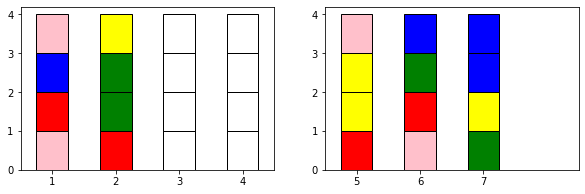

In [ ]:
plot_tubes(original_tubes)

In [7]:
def nonEmptyIndex(tube):
  i=0
  while i in range(len(tube)):
    if tube[i] != [1,1,1]:
      break
      i+=1
  return i

In [8]:
def check_transfer(tube1,tube2):

  # check if colr matches
  t1_indx = nonEmptyIndex(tube1)
  t2_indx = nonEmptyIndex(tube2)

  if t1_indx == len(tube1):  # tube1 should not be empty
    return False
  elif t2_indx == 0:  # tube2 should not be full
    return False

  t1_colr = tube1[t1_indx]
  if t2_indx < len(tube2):  # if tube not empty
    t2_colr = tube2[t2_indx]
    if t1_colr != t2_colr:  # check if color matches
      return False
  else:   # if tube empty
    if allSame([tube1]):  # if all same
      return False

  return True

In [10]:
def transfer(tube1,tube2):

  # check if colr matches
  t1_indx = nonEmptyIndex(tube1)
  t2_indx = nonEmptyIndex(tube2)
  t1_colr = tube1[t1_indx]

  i = t1_indx
  while i in range(len(tube1)):
    j = (t2_indx-1) - (i-t1_indx)
    if (tube1[i] != t1_colr) or (j == -1):
      break
    tube2[j] = tube1[i]
    tube1[i] = [1,1,1]
    i+=1

  return tube1,tube2

In [12]:
def allSame(tubes):
  colrs = []
  for tube in tubes:
    t_indx = nonEmptyIndex(tube)
    if t_indx != len(tube):  # all same if tube empty    
      colr = tube[t_indx]
      for i in range(t_indx+1,len(tube)):
        if tube[i] != colr:
          return False
      if colr not in colrs:
        colrs.append(colr)
      else:
        return False  
  return True

In [13]:
def tubes_score(tubes):
  total_score = 0
  for tube in tubes:
    t_indx = nonEmptyIndex(tube)
    if t_indx != len(tube):
      score=1; colr=tube[t_indx]
      for i in range(t_indx+1, len(tube)):
        # for n consecutive colors in a tube
        # score is given as 4^n
        if tube[i] == colr:
          score *= 4
        else:
          if score > 1:
            total_score += score
          colr = tube[i]
          score = 1
      if score > 1:
        total_score += score
    # subtract 1 for every empty tube
    # so that initial moves would have higher score than tubes being empty
    else:
      total_score -= 1    
  return total_score

In [14]:
def playGame(original_tubes, moves=None):
  tubes = copytubes(original_tubes)

  move_indx = 0
  while True:
    plot_tubes(tubes)
    print("score : %d"%(tubes_score(tubes)))
    if allSame(tubes):
      break

    if moves is None:
      i = int(input("enter tube to transfer from: ")) - 1
      j = int(input("enter tube to transfer to: ")) - 1
    else:
      i = moves[move_indx][0]
      j = moves[move_indx][1]
      print("move:%d -> transfer tube%d to tube%d"%(move_indx+1,i+1,j+1))
    tube1, tube2 = tubes[i], tubes[j]

    if check_transfer(tube1,tube2):
      transfer(tube1,tube2)
      move_indx += 1
    else:
      print("invalid move")

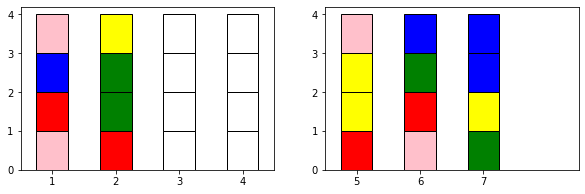

score : 10
enter tube to transfer from: 7
enter tube to transfer to: 3


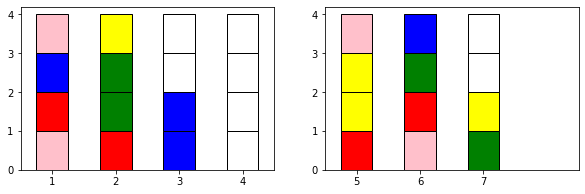

score : 11
enter tube to transfer from: 6
enter tube to transfer to: 3


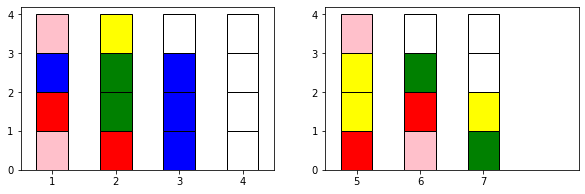

score : 23
enter tube to transfer from: 1
enter tube to transfer to: 4


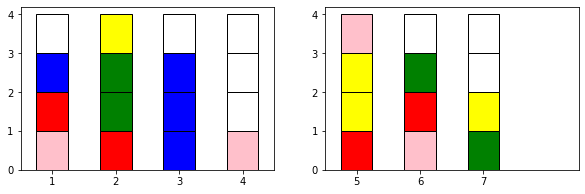

score : 24
enter tube to transfer from: 5
enter tube to transfer to: 4


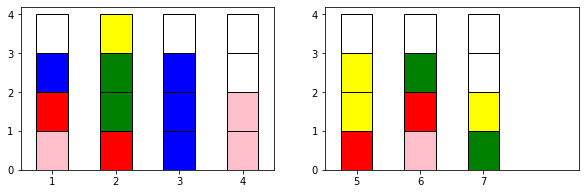

score : 28
enter tube to transfer from: 1
enter tube to transfer to: 3


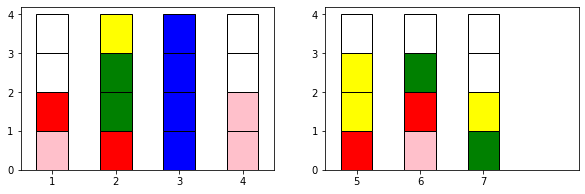

score : 76
enter tube to transfer from: 5
enter tube to transfer to: 7


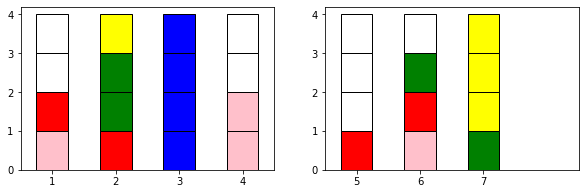

score : 88
enter tube to transfer from: 1
enter tube to transfer to: 5


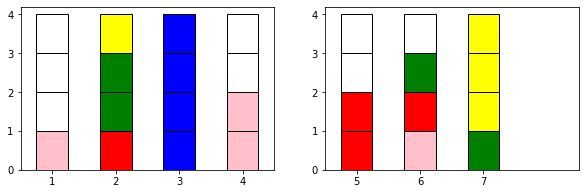

score : 92
enter tube to transfer from: 1
enter tube to transfer to: 4


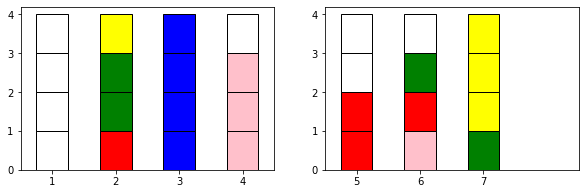

score : 103
enter tube to transfer from: 7
enter tube to transfer to: 1


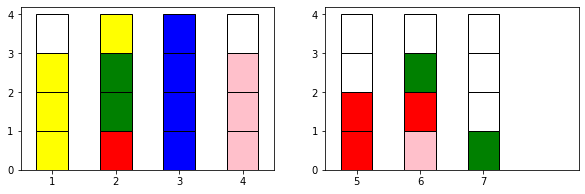

score : 104
enter tube to transfer from: 2
enter tube to transfer to: 1


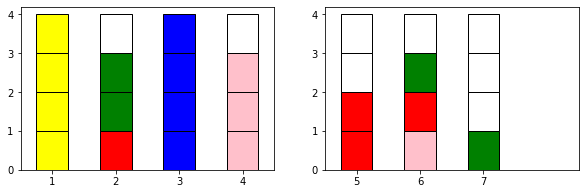

score : 152
enter tube to transfer from: 2
enter tube to transfer to: 7


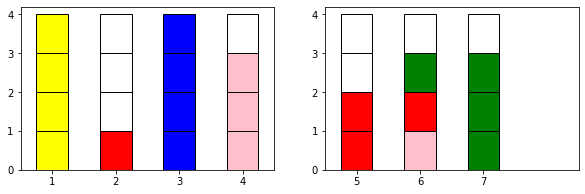

score : 164
enter tube to transfer from: 6
enter tube to transfer to: 7


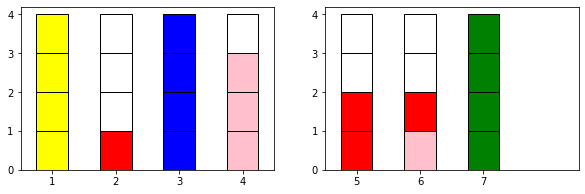

score : 212
enter tube to transfer from: 2
enter tube to transfer to: 5


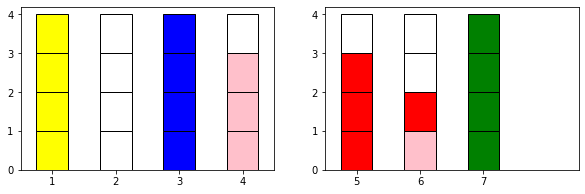

score : 223
enter tube to transfer from: 6
enter tube to transfer to: 5


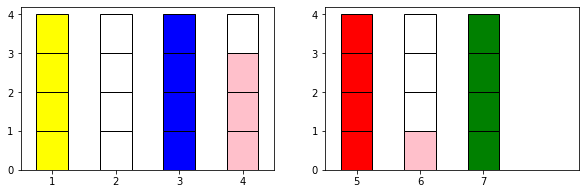

score : 271
enter tube to transfer from: 6
enter tube to transfer to: 4


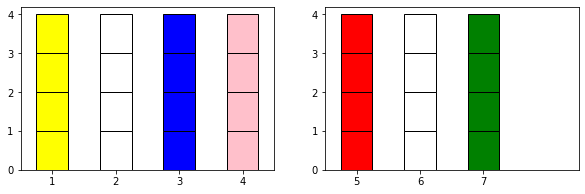

score : 318


In [16]:
playGame(original_tubes)